## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [1]:
import pandas as pd
import random
N=random.randint(10000,1310720)
total_file=pd.DataFrame(pd.read_csv('data_000637.txt'))
len_file=total_file.index.stop
file=pd.DataFrame(pd.read_csv('data_000637.txt', nrows=20000))
file


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29
19996,1,0,63,3869200366,2517,6
19997,1,0,32,3869200366,2519,5
19998,1,0,17,3869200366,2522,21


2\. Find out the number of BX in a ORBIT (the value 'x').

In [2]:
x_max=file['BX_COUNTER'].max()
x_min=file['BX_COUNTER'].min()
print('x is:',x_max-x_min+1)
print('a unit of ORBIT_CNT corresponds to', (x_max-x_min+1)*25,'ns')


x is: 3564
a unit of ORBIT_CNT corresponds to 89100 ns


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [3]:
t_max=total_file['ORBIT_CNT'].max()
t_min=total_file['ORBIT_CNT'].min()
t2=(t_max*3564+total_file['BX_COUNTER'][len_file-1])*25+(total_file['TDC_MEAS'][len_file-1]*(25/30))
t1=(t_min*3564+total_file['BX_COUNTER'][0])*25+(total_file['TDC_MEAS'][0]*(25/30))
print('the data taking is:',(t2-t1)*1e-09)

the data taking is: 0.9804160933125


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [4]:
total_file['ABS_TIME']=(total_file['ORBIT_CNT']*3564+total_file['BX_COUNTER'])*25+(total_file['TDC_MEAS']*(25/30))
total_file['ABS_TIME']=total_file['ABS_TIME']-total_file['ABS_TIME'][0]
total_file

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [5]:
for i in range(len(file['HEAD'])):
    file['HEAD'][i]=random.randint(0,1)
file

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,0,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
19995,0,0,27,3869200366,2513,29
19996,0,0,63,3869200366,2517,6
19997,0,0,32,3869200366,2519,5
19998,1,0,17,3869200366,2522,21


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [6]:
new_file=file[file['HEAD']==1]
new_file

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
6,1,0,61,3869200167,2772,14
...,...,...,...,...,...,...
19989,1,0,61,3869200366,1983,26
19990,1,0,45,3869200366,1982,17
19992,1,0,40,3869200366,2388,28
19994,1,0,21,3869200366,2513,23


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

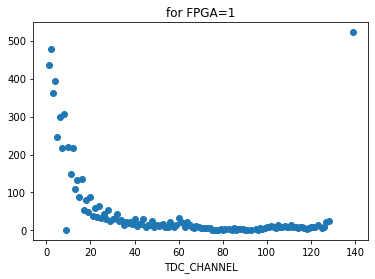

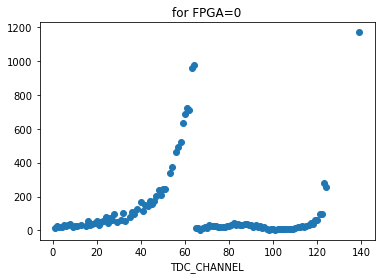

In [14]:
import matplotlib.pyplot as plt

file_1=file[file['FPGA']==1]
file_2=file[file['FPGA']==0]


file_1.groupby('TDC_CHANNEL').count()['HEAD'].plot(marker='o',ls='')
plt.title('for FPGA=1')
plt.show()

file_2.groupby('TDC_CHANNEL').count()['HEAD'].plot(marker='o',ls='')
plt.title('for FPGA=0')
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [8]:
f=pd.DataFrame(file.groupby('TDC_CHANNEL').count()['HEAD'])

f1=f.sort_values(by='HEAD',ascending=False)

print('the top 3 vaues of the TDC channels are:','\n',f1.head(3))



the top 3 vaues of the TDC channels are: 
              HEAD
TDC_CHANNEL      
139          1693
64            996
63            969


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [26]:
unique_1=total_file['ORBIT_CNT'].nunique()
print('the unique orbits are:',unique_1)

unique_2=total_file[total_file['TDC_CHANNEL']==139]['ORBIT_CNT'].nunique()
print('the unique orbits with at least one measurement of TDC_CHANNEL=139 are:',unique_2)

the unique orbits are: 11001
the unique orbits with at least one measurement of TDC_CHANNEL=139 are: 10976
